# Traffic Congestion: Exploratory Data Analysis


# Loading of data

### Import Libraries

In [1]:
#importing necessery libraries for analysis of the dataset
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime  
from datetime import date 
import calendar 
%matplotlib inline

In [2]:
#read csv file
traffic_data=pd.read_csv('https://aisgaiap.blob.core.windows.net/aiap5-assessment-data/traffic_data.csv')
#examing head of traffic data csv file 
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


**Observation:**
- We can observed from the first five rows of data that the column 'snow_1h' and 'rain_1h' has 0 as for the first 5 row's values thus there is a need for further analysation.
- We can observed that the date time in this traffic data csv format is date and hourly.

In [3]:
#Understanding the amount of of rows and columns we will be working with
traffic_data.shape

(8573, 9)

In [4]:
#checking type of every column in the dataset
traffic_data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                  int64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

**Observation:**
- We can observed that the column 'date_time' is a string as it is denote as an object type in Python. Hence there is a need to convert it to datetime type.

In [5]:
# Convert the type of 'date_time' column to a more appropriate type which is datetime 
traffic_data["date_time"] = pd.to_datetime(traffic_data["date_time"])
#examine the changes.
traffic_data.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                         int64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

# Understanding, Wrangling and Cleaning of Data

In [6]:
#Understanding the information of the columns 
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8573 entries, 0 to 8572
Data columns (total 9 columns):
holiday                8573 non-null object
temp                   8573 non-null float64
rain_1h                8573 non-null float64
snow_1h                8573 non-null int64
clouds_all             8573 non-null int64
weather_main           8573 non-null object
weather_description    8573 non-null object
date_time              8573 non-null datetime64[ns]
traffic_volume         8573 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 602.9+ KB


In [7]:
#Double Checking to find out which columns have null values
traffic_data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

**Observation:**
- We can conclude that there is no missing data in the dataset.

In [8]:
traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,8573.000000,8573.000000,8573.0,8573.000000,8573.000000
mean,278.976352,0.161284,0.0,52.560947,3286.762160
std,13.322459,1.439626,0.0,37.470062,2028.322769
min,244.820000,0.000000,0.0,0.000000,164.000000
25%,269.460000,0.000000,0.0,1.000000,1193.000000
50%,277.330000,0.000000,0.0,64.000000,3344.000000
75%,290.400000,0.000000,0.0,90.000000,5001.000000
max,308.240000,55.630000,0.0,100.000000,7217.000000


**Observation:**
- By looking at the difference between min and max and the mean, it seems that the column 'rain_1h' has outliers that causes the wide range. There is a need to further analyze this column. 
- By observation, the column 'snow_1h' has only 0.0 as it's value. Hence, the column 'snow_1h' can be dropped as it is insignificant for future analysis and prediction. 
- The column 'traffic_volume' has a wide range. This is expected as there is a difference between peak period and non-peak or wet weather and sunny weather.

In [9]:
#Observe the value counts for each unique value in rain_1h.
traffic_data.rain_1h.value_counts().sort_index()

0.00     7939
0.25      206
0.29        3
0.30        8
0.32        1
         ... 
21.42       3
25.32       3
28.70       2
44.45       1
55.63       1
Name: rain_1h, Length: 98, dtype: int64

In [10]:
# Display the rain that occurred in that 1h
traffic_data[traffic_data['rain_1h']>0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
4129,None,288.86,0.25,0,92,Rain,light rain,2013-06-05 10:00:00,4423
4130,None,289.11,0.25,0,92,Rain,moderate rain,2013-06-05 11:00:00,4756
4131,None,289.48,0.25,0,92,Rain,light rain,2013-06-05 12:00:00,4959
4132,None,289.54,0.25,0,92,Rain,light rain,2013-06-05 13:00:00,5093
4134,None,289.30,0.25,0,92,Rain,light rain,2013-06-05 15:00:00,6055
...,...,...,...,...,...,...,...,...,...
8497,None,269.11,0.25,0,64,Mist,mist,2013-12-28 23:00:00,1555
8539,None,256.01,0.76,0,90,Rain,light rain,2013-12-30 15:00:00,4233
8540,None,256.01,0.76,0,90,Snow,light snow,2013-12-30 15:00:00,4233
8541,None,255.81,0.25,0,90,Rain,light rain,2013-12-30 16:00:00,3938


In [11]:
#Calculating the percentage of data in 'rain_1h' that has value more than 0.0
print((632/8572)*100)

7.372841810545963


**Observation:**
- As observed, there is a total of 8572 rows. Out of 8572 rows, 7939 rows has the value of 0.0. Only 634 rows has values that are more than 0. This mean only around 7.37 percentage of  the dataset for column 'rain_1h' has value more than 0. Thus, this attribute should be drop as it is insignificant for further analysis.
- The data is taken in the year 2013. For every 24 hours we have 24 observations. Hence, a total of `24*365 = 8760` observations should be recorded. However this dataset only has 8572. This means that there are some data missing.

In [12]:
#To find out and confirm the unique value in 'snow_1h' is 0
traffic_data.snow_1h.unique()

array([0], dtype=int64)

**Observation:**
- As expected, the unique value in 'snow_1h' is 0 only.

**conclusion**
- There is a need to drop the column 'snow_1h' as there is no value in this features for our future data exploration and prediction.

In [13]:
# Extract just the month from the date_time column
traffic_data["start_date_month"] = traffic_data["date_time"].apply(lambda row: row.month)
# Extract just the hour from the date_time column
traffic_data["start_date_hour"] = traffic_data["date_time"].apply(lambda row: row.hour)
# Extract just the day of the week from the date_time column
traffic_data['dayofweek']=traffic_data['date_time'].dt.weekday_name
# Take a look at the date_time column and new month and hour columns
traffic_data[['date_time', 'start_date_month','start_date_hour','dayofweek']].head()

,date_time,start_date_month,start_date_hour,dayofweek
0,2013-01-01 00:00:00,1,0,Tuesday
1,2013-01-01 01:00:00,1,1,Tuesday
2,2013-01-01 02:00:00,1,2,Tuesday
3,2013-01-01 03:00:00,1,3,Tuesday
4,2013-01-01 04:00:00,1,4,Tuesday


In [14]:
#let the value to be 0 if the holiday is None else 1
traffic_data["holiday"]=traffic_data["holiday"].apply(lambda val: 0 if val=='None' else 1)
traffic_data[['holiday']].head()

,holiday
0,1
1,0
2,0
3,0
4,0


In [15]:
#Let the value be 1 if the day of the week is Sunday or Saturday else 0
traffic_data['is_weekend'] = np.where(traffic_data['dayofweek'].isin(['Sunday','Saturday']),1,0)
traffic_data[['date_time','is_weekend']].head()

,date_time,is_weekend
0,2013-01-01 00:00:00,0
1,2013-01-01 01:00:00,0
2,2013-01-01 02:00:00,0
3,2013-01-01 03:00:00,0
4,2013-01-01 04:00:00,0


In [16]:
#examing the changes
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,start_date_month,start_date_hour,dayofweek,is_weekend
0,1,263.49,0.0,0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439,1,0,Tuesday,0
1,0,263.78,0.0,0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502,1,1,Tuesday,0
2,0,264.16,0.0,0,75,Snow,heavy snow,2013-01-01 02:00:00,933,1,2,Tuesday,0
3,0,263.95,0.0,0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576,1,3,Tuesday,0
4,0,263.65,0.0,0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372,1,4,Tuesday,0


In [17]:
traffic_data.dtypes

holiday                         int64
temp                          float64
rain_1h                       float64
snow_1h                         int64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
start_date_month                int64
start_date_hour                 int64
dayofweek                      object
is_weekend                      int32
dtype: object

In [18]:
#Examing some interesting categorical unique values
traffic_data.weather_main.unique()

array(['Clouds', 'Snow', 'Clear', 'Mist', 'Haze', 'Fog', 'Rain',
       'Drizzle', 'Thunderstorm', 'Squall'], dtype=object)

In [19]:
#Observe the value counts for each unique value in weather main.
traffic_data.weather_main.value_counts().sort_index()

Clear           2169
Clouds          3136
Drizzle          230
Fog              123
Haze             201
Mist            1034
Rain             889
Snow             674
Squall             3
Thunderstorm     114
Name: weather_main, dtype: int64

**Observation:**
- The values look normal as Squall does not happen often.

In [20]:
#Examing some interesting categorical unique values
traffic_data.weather_description.unique()

array(['broken clouds', 'scattered clouds', 'heavy snow',
       'overcast clouds', 'few clouds', 'sky is clear', 'mist', 'haze',
       'fog', 'light rain', 'moderate rain', 'drizzle',
       'light intensity drizzle', 'snow', 'freezing rain', 'shower snow',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'heavy intensity drizzle', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle'], dtype=object)

In [21]:
#Observe the value counts for each unique value in weather description.
traffic_data.weather_description.value_counts().sort_index()

SQUALLS                                   3
Sky is Clear                            675
broken clouds                          1194
drizzle                                  75
few clouds                              354
fog                                     123
freezing rain                             1
haze                                    201
heavy intensity drizzle                  10
heavy intensity rain                     56
heavy snow                              397
light intensity drizzle                 145
light intensity shower rain               2
light rain                              617
light rain and snow                       3
light snow                              202
mist                                   1034
moderate rain                           205
overcast clouds                        1070
proximity thunderstorm                   59
proximity thunderstorm with drizzle       2
proximity thunderstorm with rain          9
scattered clouds                

**Observation:**
- We observed that there is duplicate values,namely 'sky is clear' and 'Sky is Clear'.

In [22]:
#standardize words
traffic_data["weather_description"]= traffic_data["weather_description"].replace('Sky is Clear', "sky is clear")
#examing the changes
traffic_data.weather_description.unique()

array(['broken clouds', 'scattered clouds', 'heavy snow',
       'overcast clouds', 'few clouds', 'sky is clear', 'mist', 'haze',
       'fog', 'light rain', 'moderate rain', 'drizzle',
       'light intensity drizzle', 'snow', 'freezing rain', 'shower snow',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'heavy intensity drizzle', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle'], dtype=object)

# Exploring and Data Visualization

### Timeseries Plot - Observations vs Vehicle Count
A simple line plot of all the observations.

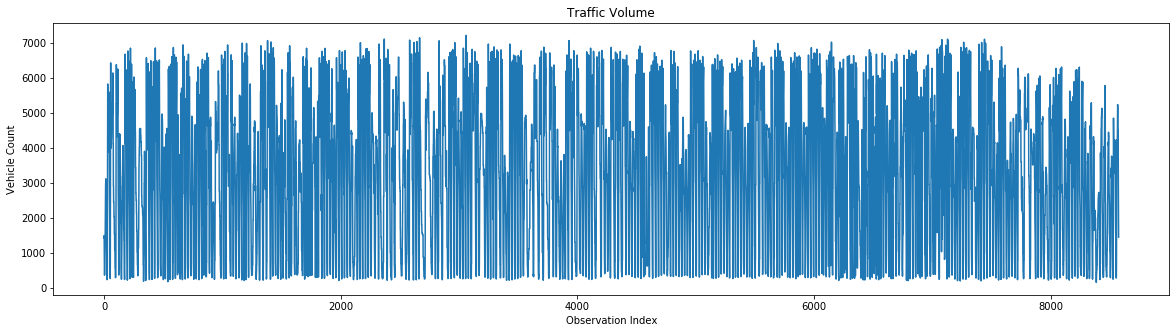

In [23]:
plt.figure(figsize=(20,5))
plt.plot(traffic_data.index, traffic_data['traffic_volume'])
plt.title('Traffic Volume')
plt.xlabel('Observation Index')
plt.ylabel('Vehicle Count');
plt.show(block=False)

**Observation:**
- No trend can be identified.
- No seasonality can be identified.

**Conclusion:**
- Further analysis required.

### Correlation

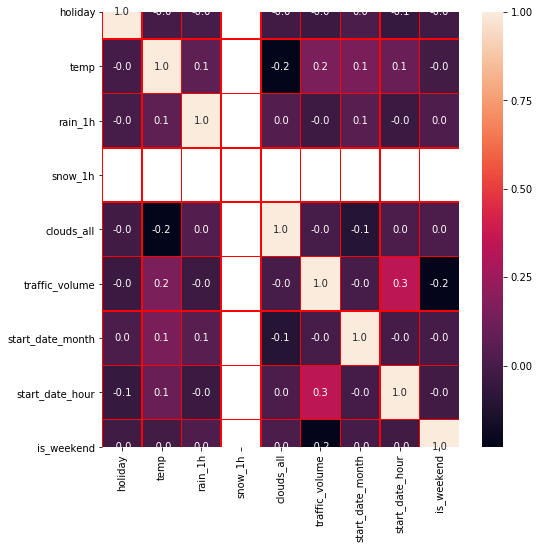

In [24]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(traffic_data.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".1f",ax=ax)
plt.show()

**Observation:**
- start_date_hour is most correlated to traffic volume.


### Feature: Start Date Hour

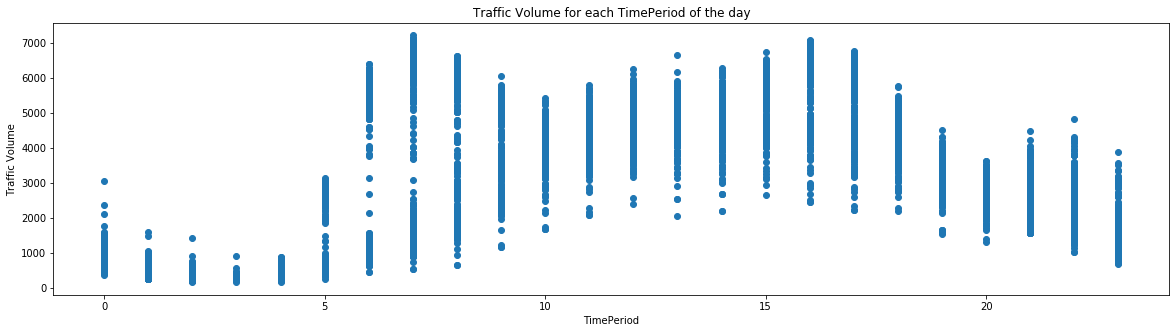

In [25]:
#plot the graph using raw data
x = traffic_data['start_date_hour']
y = traffic_data['traffic_volume']
plt.figure(figsize=(20,5))
plt.title('Traffic Volume for each TimePeriod of the day')
plt.xlabel('TimePeriod')
plt.ylabel('Traffic Volume');
plt.scatter(x, y, marker='o')
plt.show()

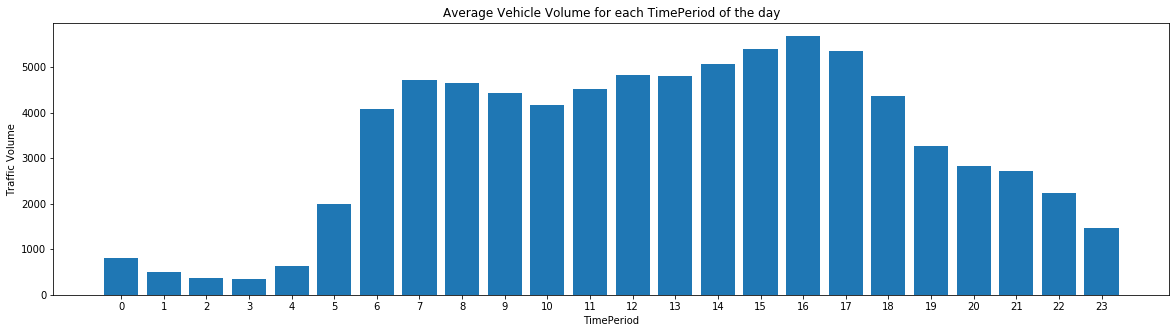

In [26]:
#Taking the average
avgTimePeriodData = traffic_data[['start_date_hour', 'traffic_volume']]
avgTimePeriodData = avgTimePeriodData.groupby('start_date_hour', as_index=False).mean()

plt.figure(figsize=(20,5))
plt.bar(avgTimePeriodData['start_date_hour'], avgTimePeriodData['traffic_volume'])
plt.xticks(np.arange(0,24))
plt.title('Average Vehicle Volume for each TimePeriod of the day')
plt.xlabel('TimePeriod')
plt.ylabel('Traffic Volume');
plt.show(block=False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


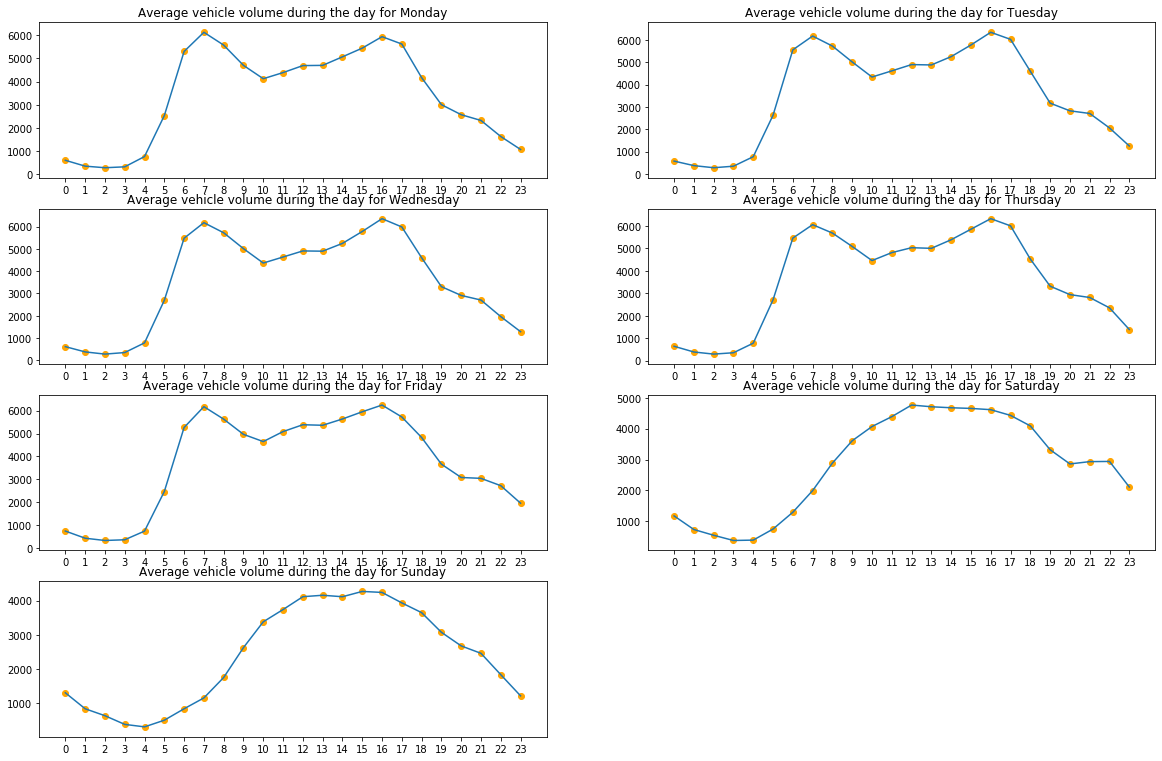

In [27]:
dayList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekDayWiseAvgTPData = traffic_data[['start_date_hour', 'traffic_volume']]
weekDayWiseAvgTPData['dayofweek'] = traffic_data['dayofweek']
weekDayWiseAvgTPData = weekDayWiseAvgTPData.groupby(['dayofweek', 'start_date_hour'], as_index=False).mean()

fig = plt.figure(figsize=(20,20))
fig.tight_layout()
for i in range(7):
    dataWeekly = weekDayWiseAvgTPData[weekDayWiseAvgTPData['dayofweek'] == dayList[i]] # select dataframe with month = i
    ax = fig.add_subplot(6,2,i+1) # add subplot in the i-th position on a grid 12x1  
    ax.title.set_text('Average vehicle volume during the day for '+ dayList[i])
    ax.plot(dataWeekly['start_date_hour'], dataWeekly['traffic_volume'])
    ax.scatter(dataWeekly['start_date_hour'], dataWeekly['traffic_volume'], c='orange')
    ax.set_xticks(dataWeekly['start_date_hour'].unique()) # set x axis


**Observation**
- The first graph illustrates the volume of traffic during different time intervals of the day for the entire dataset.
- The second graph illustrates the average volume of traffic during different time intervals of the day for the entire dataset.
- The third graph illustrates the average volume of traffic during different time intervals of the day for the individual days of the week.
- On weekdays, the average data plots show similar patterns. The graph shape of average plot and weekday plots are very similar.
- On weekends, the average data plots show dissimilar patterns to the weekdays. The graph shape for average plot and weekend plots are dissimilar.

**Conclusion:**
- The peak period for weekdays are around 7:00 in the morning and 16:00 in the evening.
- During 0:00 to 5:00 , there is a significantly lower traffic volume than the rest of the timing. This is reasonable as most people will be asleep.
- It can be concluded that there is a **daily seasonality** in the data as similar patterns can be observed in traffic frequency for particular time intervals.

### Feature: Start Date Month

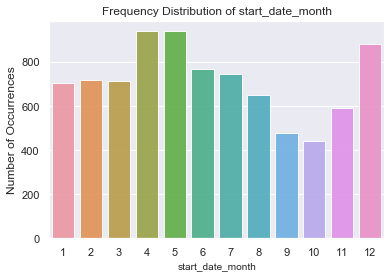

In [28]:
#plot the graph using raw data
start_date_month = traffic_data['start_date_month'].value_counts()
sns.set(style="darkgrid")
sns.barplot(start_date_month.index, start_date_month.values, alpha=0.9)
plt.title('Frequency Distribution of start_date_month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('start_date_month', fontsize=10)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


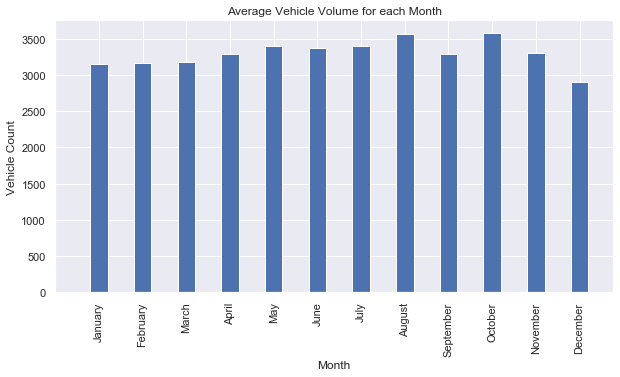

In [29]:
#Taking the average
monthList= ['','January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthWiseAvgData = traffic_data[['traffic_volume']]
monthWiseAvgData['Month'] = traffic_data['start_date_month']
monthWiseAvgData = monthWiseAvgData.groupby(['Month'], as_index=False).mean()

plt.figure(figsize=(10,5))
plt.bar(monthWiseAvgData['Month'], monthWiseAvgData['traffic_volume'], width=0.4)
plt.xticks(np.arange(0,13), monthList, rotation='vertical')
plt.title('Average Vehicle Volume for each Month')
plt.xlabel('Month')
plt.ylabel('Vehicle Count');
plt.show(block=False)

**Observation**
- The first graph illustrates the volume of traffic during different months for the year of 2013.
- The second graph illustrates the average volume of traffic during different months for the year of 2013.

**Conclusion:**
- The average traffic volume rises till October and then decreases. Hence, this tell us that traffic volume is low during the end of the year. This is a reasonable deduction as it snows during the end of the year and hence people may not travel out to work.
-  As there is only 1 year data, it is difficult to know is there **annual seasonality**.

### Feature: dayofweek

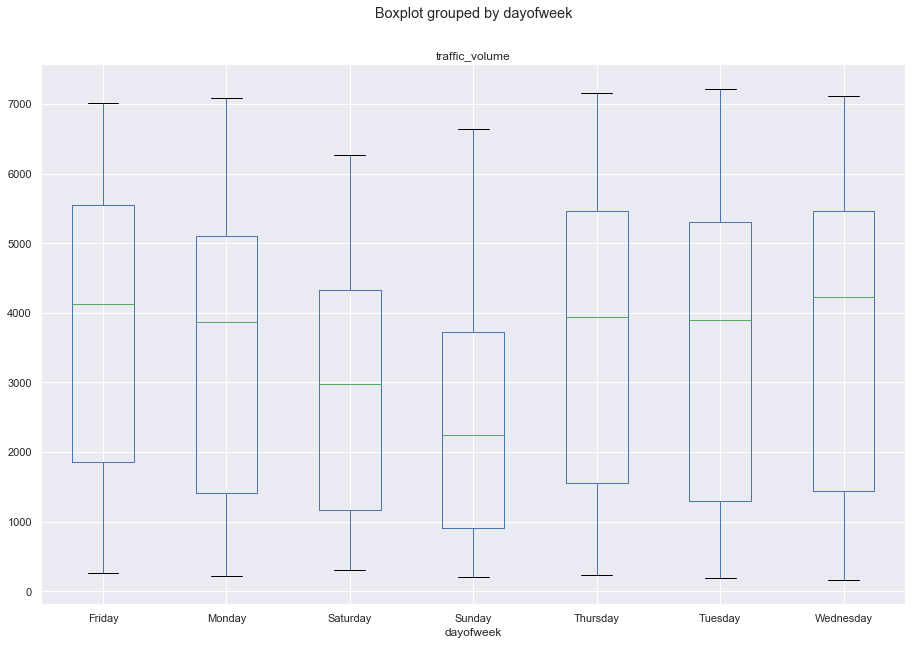

In [30]:
traffic_data.boxplot('traffic_volume','dayofweek',figsize=(15,10))

**Observation**
- Higher traffic volumne during during weekdays than weekends. On Sunday, it has the lowest mean of traffic volume.

**Conclusion:**
- It can be safely concluded that there is a **weekly seasonality** in the data as similar patterns can be observed in traffic frequency for each week at a monthly scale.
- The weekdays have more traffic than the weekends.

### Feature: Is Weekend

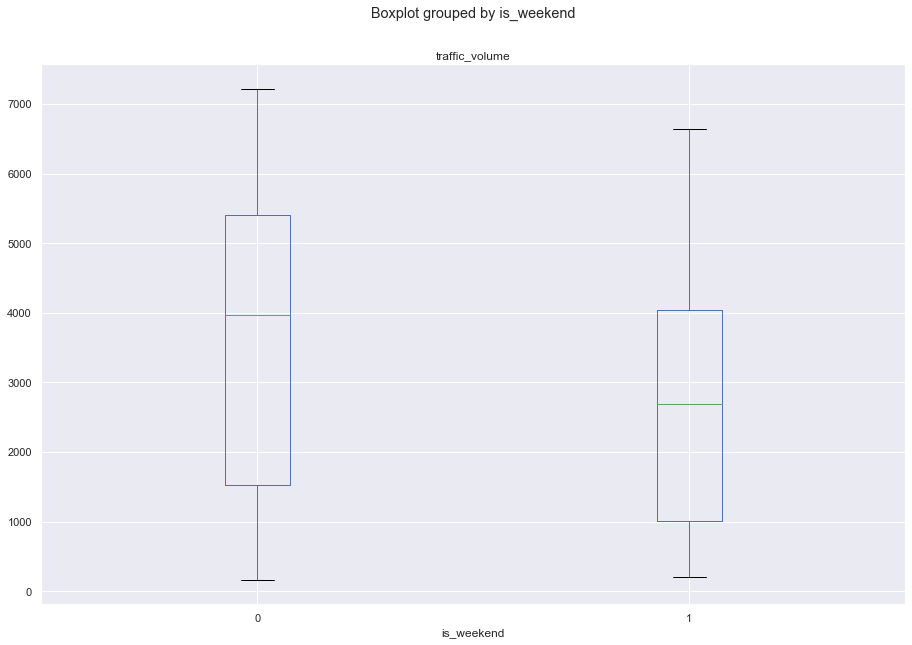

In [31]:
traffic_data.boxplot('traffic_volume','is_weekend',figsize=(15,10))

**Observation**
- There is a higher mean for traffic volumne when it is not weekend.

**Conclusion:**
- Traffic volumne is most likely to be higher during weekdays than weekend.

### Feature: Holiday

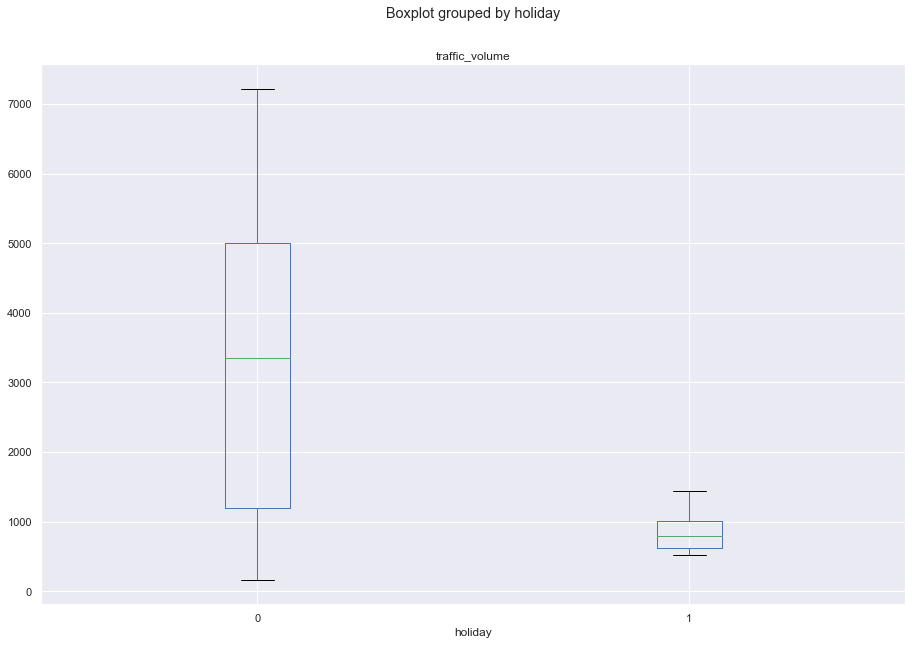

In [32]:
traffic_data.boxplot('traffic_volume','holiday',figsize=(15,10))

In [33]:
traffic_data[traffic_data['holiday']==1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,start_date_month,start_date_hour,dayofweek,is_weekend
0,1,263.49,0.00,0,58,Clouds,broken clouds,2013-01-01,1439,1,0,Tuesday,0
1138,1,258.96,0.00,0,20,Clouds,few clouds,2013-02-18,556,2,0,Monday,0
3871,1,286.37,0.00,0,90,Clouds,overcast clouds,2013-05-27,863,5,0,Monday,0
4855,1,290.08,0.00,0,1,Clear,sky is clear,2013-07-04,1060,7,0,Thursday,0
6016,1,297.42,0.00,0,12,Clouds,few clouds,2013-08-22,661,8,0,Thursday,0
6183,1,288.78,0.00,0,0,Clear,sky is clear,2013-09-02,1041,9,0,Monday,0
6896,1,277.72,0.00,0,0,Clear,sky is clear,2013-10-14,615,10,0,Monday,0
7209,1,275.44,0.00,0,64,Clouds,broken clouds,2013-11-11,514,11,0,Monday,0
7622,1,268.24,0.00,0,64,Clouds,broken clouds,2013-11-28,929,11,0,Thursday,0
8380,1,260.17,0.25,0,64,Rain,light rain,2013-12-25,712,12,0,Wednesday,0


**Observation**
- There is a lower mean for traffic volume when it is a holiday.

**Conclusion:**
- Traffic volumne is most likely to lower when it is a holiday regardless if the dayof week is a weekday. Hence, this tell us that holiday does influence the traffic volume.

### Feature: Temp

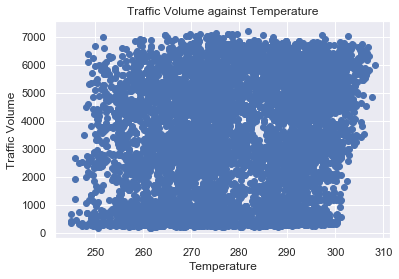

In [34]:
x = traffic_data['temp']
y = traffic_data['traffic_volume']
plt.scatter(x, y, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume against Temperature')
plt.show()

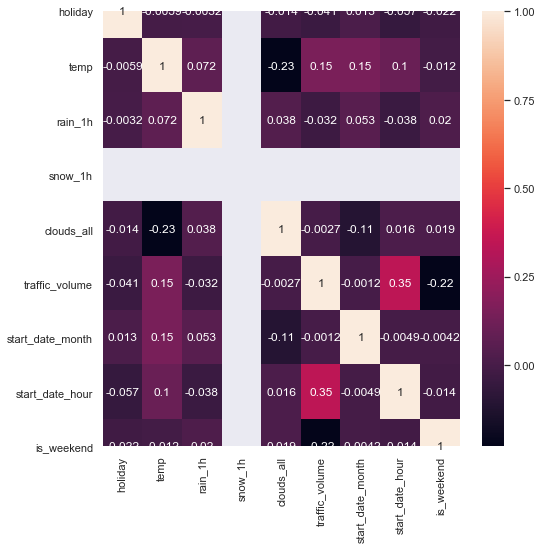

In [35]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(traffic_data.corr(),annot=True,linecolor="red",ax=ax)
plt.show()

**Observation**
- There is a no trend observed in the first graph.
- Negative correlation between traffic_volume and temp.

### Feature: Cloud All

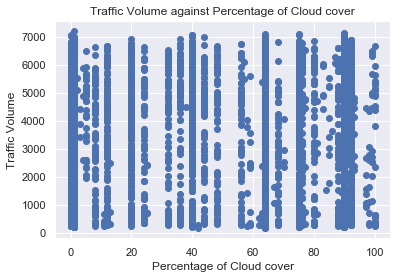

In [36]:
x = traffic_data['clouds_all']
y = traffic_data['traffic_volume']
plt.scatter(x, y, marker='o')
plt.xlabel('Percentage of Cloud cover')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume against Percentage of Cloud cover')
plt.show()

**Observation**
- There is a no trend observed from the grpah above.
- Negative correlation between traffic_volume and cloud_all seen in the graph above Traffic Volume against Percentage of Cloud cover.

### Feature: Weather Main

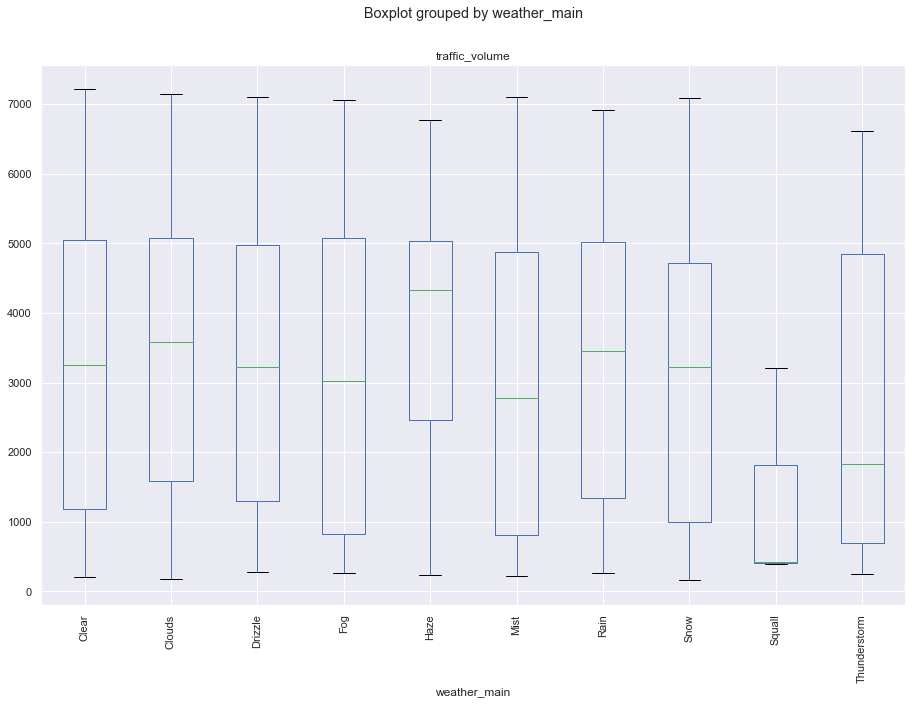

In [37]:
traffic_data.boxplot('traffic_volume','weather_main',rot = 90,figsize=(15,10))

**Observation**
- The mean is the highest in haze. 
- The box plot is dissimilar compared to the others.

**Conclusion:**
- on days that has haze, there is a higher amount of traffic volume,which is reasonable since people will tend to stay at home for health reason.
- A squall is a sudden, sharp increase in wind speed lasting minutes, contrary to a wind gust lasting seconds. Hence it makes sense for traffic volume to be low as it is dangerous to be out during such weather.

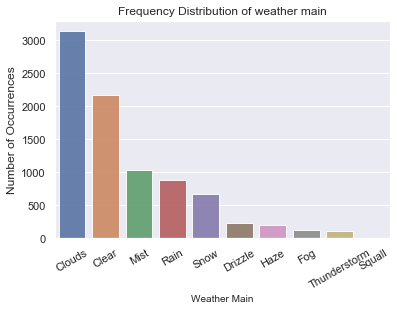

In [38]:
weather_count = traffic_data['weather_main'].value_counts()
sns.set(style="darkgrid")
sns.barplot(weather_count.index, weather_count.values, alpha=0.9)
plt.title('Frequency Distribution of weather main')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather Main', fontsize=10)
plt.xticks(rotation=30)
plt.show()

**Observation**
- Clouds have the most number of occurences.
- Squall have the lease number of occurences.

**Conclusion:**
- The observation is expected as most of the day should be Clouds and Squall does not happen often as there is specific condition for Squall to happen. 

### Feature: Weather Description

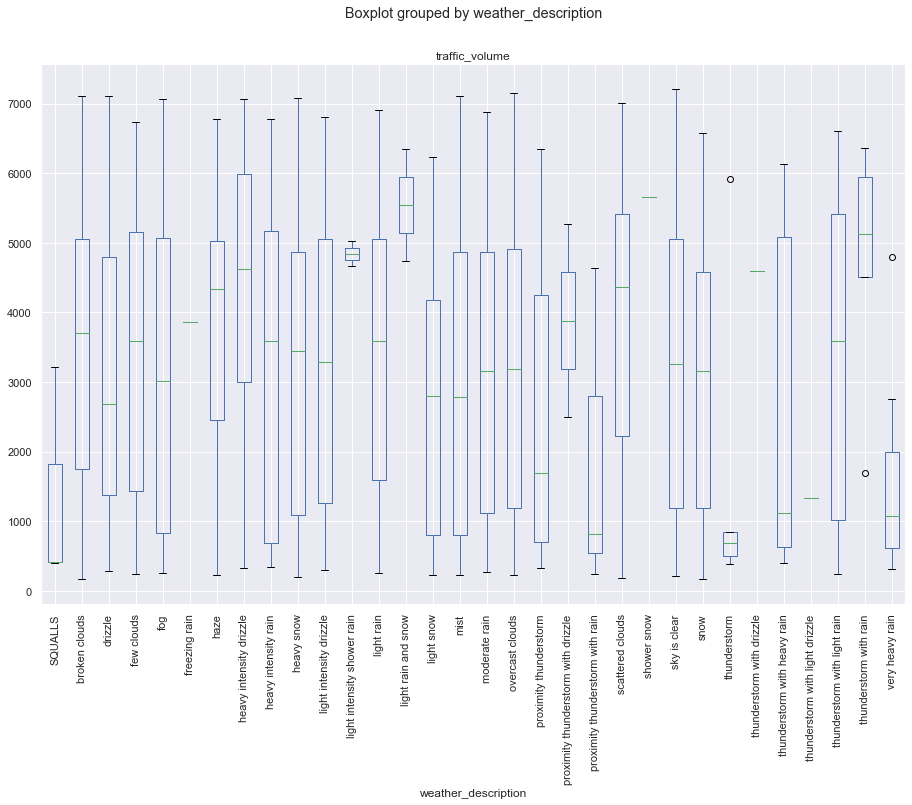

In [39]:
traffic_data.boxplot('traffic_volume','weather_description',rot = 90,figsize=(15,10))

In [40]:
traffic_data[traffic_data['weather_description']=='thunderstorm']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,start_date_month,start_date_hour,dayofweek,is_weekend
4021,0,290.99,0.00,0,90,Thunderstorm,thunderstorm,2013-06-01 02:00:00,557,6,2,Saturday,1
4373,0,291.34,0.38,0,32,Thunderstorm,thunderstorm,2013-06-13 01:00:00,456,6,1,Thursday,0
4609,0,295.29,0.00,0,1,Thunderstorm,thunderstorm,2013-06-24 04:00:00,848,6,4,Monday,0
4613,0,294.42,9.14,0,90,Thunderstorm,thunderstorm,2013-06-24 06:00:00,5913,6,6,Monday,0
5101,0,295.42,0.00,0,20,Thunderstorm,thunderstorm,2013-07-14 03:00:00,381,7,3,Sunday,1
5261,0,291.99,0.00,0,0,Thunderstorm,thunderstorm,2013-07-21 02:00:00,692,7,2,Sunday,1
5662,0,289.48,9.53,0,90,Thunderstorm,thunderstorm,2013-08-06 04:00:00,852,8,4,Tuesday,0


In [41]:
traffic_data[traffic_data['weather_description']=='thunderstorm with rain']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,start_date_month,start_date_hour,dayofweek,is_weekend
3593,0,286.37,0.00,0,90,Thunderstorm,thunderstorm with rain,2013-05-19 08:00:00,1700,5,8,Sunday,1
3640,0,291.21,0.00,0,90,Thunderstorm,thunderstorm with rain,2013-05-20 08:00:00,6369,5,8,Monday,0
3652,0,294.28,0.00,0,90,Thunderstorm,thunderstorm with rain,2013-05-20 17:00:00,5948,5,17,Monday,0
4395,0,290.05,3.65,0,100,Thunderstorm,thunderstorm with rain,2013-06-13 12:00:00,5126,6,12,Thursday,0
5299,0,289.48,5.97,0,0,Thunderstorm,thunderstorm with rain,2013-07-22 10:00:00,4503,7,10,Monday,0


In [42]:
traffic_data[traffic_data['weather_description']=='very heavy rain']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,start_date_month,start_date_hour,dayofweek,is_weekend
4574,0,291.76,16.38,0,76,Rain,very heavy rain,2013-06-22 05:00:00,635,6,5,Saturday,1
4620,0,295.82,44.45,0,76,Rain,very heavy rain,2013-06-24 11:00:00,4802,6,11,Monday,0
5105,0,292.82,19.90,0,20,Rain,very heavy rain,2013-07-14 05:00:00,542,7,5,Sunday,1
5108,0,292.65,25.32,0,8,Rain,very heavy rain,2013-07-14 06:00:00,958,7,6,Sunday,1
5111,0,292.87,21.42,0,90,Rain,very heavy rain,2013-07-14 07:00:00,1745,7,7,Sunday,1
5688,0,289.10,55.63,0,68,Rain,very heavy rain,2013-08-07 02:00:00,315,8,2,Wednesday,0
8175,0,262.65,18.80,0,64,Rain,very heavy rain,2013-12-16 19:00:00,2755,12,19,Monday,0
8247,0,264.50,28.70,0,64,Rain,very heavy rain,2013-12-19 23:00:00,1190,12,23,Thursday,0


**Observation**
- There is outlier in 3 features, namely 'thunderstorm','thunderstorm with rain' and 'very heavy rain'
- When the weather is 'SQUALLS', 'thunderstorm' and 'very heavy rain' the traffic volume is the lowest. 
- When the weather is 'light rain and snow', 'thunderstorm with rain', 'thunderstorm with drizzle', the traffic volume is the one of the highest.

**Conclusion:**
- The outlier are valid as other factors are causing it to be on there.
- There maybe other factors affecting traffic volume apart from just weather.

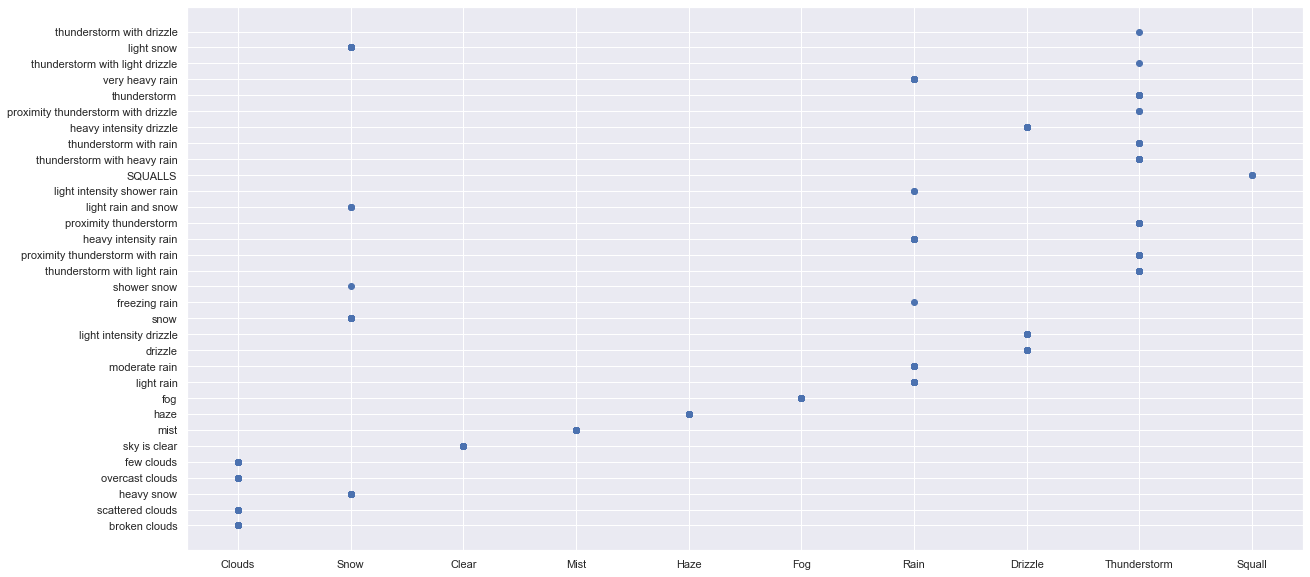

In [43]:
plt.figure(figsize=(20,10))
x = traffic_data['weather_main']
y = traffic_data['weather_description']
plt.scatter(x, y, marker='o')
plt.show()

**Observation**
- 'weather_description' column is the subset of 'weather_main'.

**Conclusion:**
- We should drop one of the columns when we train the dataset since there is a high association between these two features.

# Conclusion

This traffic dataset is a rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. 

- We observed that there is higher traffic volume during weekdays rather than weekend.
- The road traffic volume will be different during different weather condition. During squall and thunderstorm weather (specifically thunderstorm and thunderstorm with heavy rain), there is lower traffic volmne compared to thunderstorm with rain. 
- The road traffic volume will dependent on the different hours of the day (peak hour period vs non-peak period). Hence, **daily seasonality** can be expected.
- The road traffic volume on weekdays will be greater than weekends. Hence **weekly seasonality** can be expected.
- If national holdiay occur on a weekday, the road traffic volume will be different.

Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. 